# Pandas의 Plot 기능

- https://pandas.pydata.org/docs/user_guide/visualization.html

- `df.plot(kind='xxx')`
    + kind: line, bar, pie, hist, kde, box, scatter, area 등
- `df.plot.xxx()`
    + xxx : kind 의 종류 
    + 예) df.plot.bar()
- DataFrame, Series
    + `DataFrame.plot(*args, **kwargs)`
    + `Series.plot(*args, **kwargs)`
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas-dataframe-plot
- https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas-series-plot

## 주요 Parameters

- x : DataFrame 일 경우 사용됨
- y : DataFrame 일 경우 사용됨
- kind : 'line', 'bar','barh','hist','box','kde','density','area','pie','scatter'(DataFrame Only)
- layout : (row, column) 의 Tuple 로 subplot의 shape 지정
- subplots : bool, default False, 각 컬럼을 subplots 로 분리함
- sharex, sharey : subplots=True 인 경우 가용
- figsize : Tuple, (width, height) in inches
- use_index : bool, default True (index 를 x 축의 ticks 로 사용)
- title : 제목
- grid : bool, default None, 눈금선
- legend : bool
- style : stylelist or dict, The matplotlib line style per column
- xticks : sequence (xticks 로 사용할 값들)
- yticks : sequence (yticks 로 사용할 값들)
- xlim, ylim : x, y에 대한 limitation
- xlabel, ylabel : x, y 축에 대한 이름
- rot : int, Rotation for ticks
- fontsize : int, xticks / yticks 에 대한 폰트 크기
- stacked : bool, default False in line and bar plots, True in area plot
- sort_columns : bool, column names 정렬
- secondary_y : bool, 2중축

## 사전 환경 구성

### Local Jupyter Notebook 환경

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False 
# plt.rc('font', family='NanumGothic')
plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='AppleGothic') 

# sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='whitegrid')
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='whitegrid')
# sns.set(font="AppleGothic", rc={"axes.unicode_minus":False}, style='whitegrid')

### Google Colab 환경

In [ ]:
###########폰트 라이브러리 불러오기#############
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

!sudo apt-get install -qq -y fonts-nanum

%config InlineBackend.figure_format = 'retina'
sys_font=fm.findSystemFonts()
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
mpl.font_manager._rebuild()
print('설치가 되었습니다.')

In [ ]:
# 위의 코드 실행 후 colab 메뉴에서 '런타임' -> '런타임 다시 시작' 실행

In [ ]:
####### 런타임 다시 시작 후 실행 #######
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns

plt.rcParams['font.family']='NanumGothic'  #폰트 설정
fm._rebuild()
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='whitegrid')

## Line Plot

In [6]:
data = {'국가': ['대한민국', '미국', '중국', '호주'], 
        '1분기': [60, 70, 80, 70],
        '2분기': [70, 72, 78, 75],
        '3분기': [80, 75, 80, 80],
        '4분기': [90, 80, 82, 85]}
df = pd.DataFrame(data)
df.index = [3, 4, 5, 6]
dfidx = df.set_index('국가')
df

,국가,1분기,2분기,3분기,4분기
3,대한민국,60,70,80,90
4,미국,70,72,75,80
5,중국,80,78,80,82
6,호주,70,75,80,85


In [7]:
dfidx

,1분기,2분기,3분기,4분기
국가,,,,
대한민국,60,70,80,90
미국,70,72,75,80
중국,80,78,80,82
호주,70,75,80,85


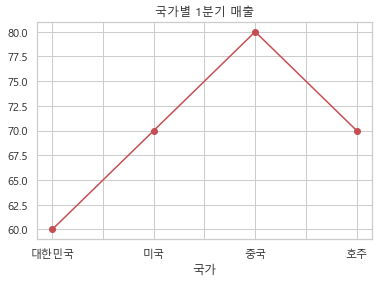

In [8]:
# x, y 축을 지정한다
# x축 : 국가, y축: 1분기, style=ro-
df.plot.line(x='국가', y='1분기', style='ro-', legend=False, title='국가별 1분기 매출')
# dfidx['1분기'].plot.line(title='국가별 1분기 매출', style='ro-')
plt.show()

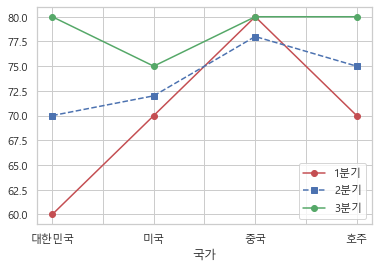

In [9]:
# x축가 복수 개의 y 축을 지정한다
# x축 : 국가, y축: [ 1분기, 2분기, 3분기], style=[ro-, bs--, go-]
df.plot(kind='line', x='국가', y=['1분기', '2분기', '3분기'], style=['ro-', 'bs--', 'go-'])
plt.show()

Index(['대한민국', '미국', '중국', '호주'], dtype='object', name='국가')


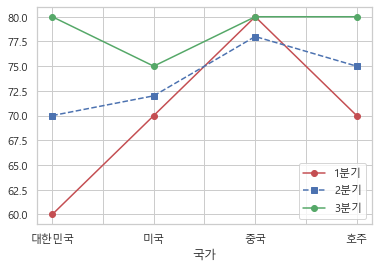

In [10]:
# index를 x축으로 사용하고, y축을 지정하는 경우
print(dfidx.index)
dfidx.plot.line(y=['1분기','2분기','3분기'], style=['ro-', 'bs--', 'go-'])
plt.show()

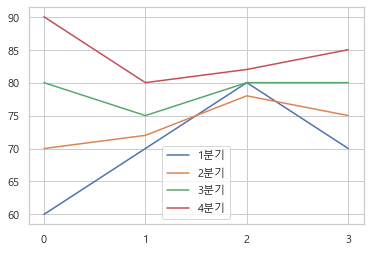

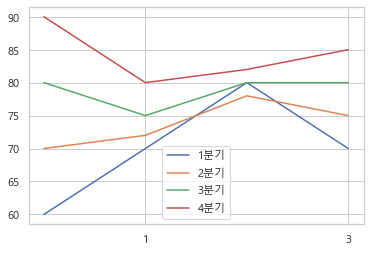

In [11]:
# DataFrame의 모든 숫자형 컬럼에 대해 선 그래프를 그림
# use_index=True 가 기본값이므로 x 축 지정이 없을 때 x 축은 index가 사용됨
# 표시되는 눈금을 xticks 를 사용하 지정할 수 있음
# use_index=False, xticks=[0,1,2,3]
df.plot.line(use_index=False, xticks=[0,1,2,3])
dfidx.plot.line(use_index=False, xticks=[1,3])
plt.show()

In [12]:
# DataFrame에서 행/열 바뀌기 (DataFrame.T)
dfT = dfidx.T
dfT['합계'] = dfT.loc[:, '대한민국':'호주'].sum(axis=1)
dfT

국가,대한민국,미국,중국,호주,합계
1분기,60,70,80,70,280
2분기,70,72,78,75,295
3분기,80,75,80,80,315
4분기,90,80,82,85,337


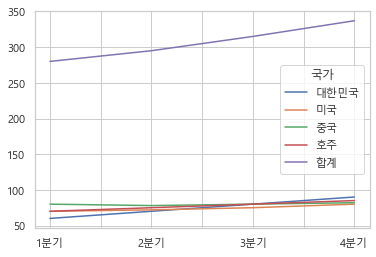

In [13]:
# dfT를 사용하여 선그래프 그리기
# x축은 index, y축은 모든 컬럼
dfT.plot.line()
plt.show()

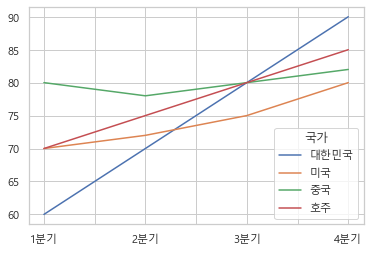

In [15]:
# dfT를 사용하여 선그래프 그리기
# x축 생략, y축은 [대한민국, 미국, 중국, 호주]를 사용함
dfT.plot.line(y=['대한민국','미국','중국','호주'])
plt.show()

## 2중축 차트

In [16]:
print(dfidx.index, dfT.index, sep='\n')

Index(['대한민국', '미국', '중국', '호주'], dtype='object', name='국가')
Index(['1분기', '2분기', '3분기', '4분기'], dtype='object')


In [17]:
dfT

국가,대한민국,미국,중국,호주,합계
1분기,60,70,80,70,280
2분기,70,72,78,75,295
3분기,80,75,80,80,315
4분기,90,80,82,85,337


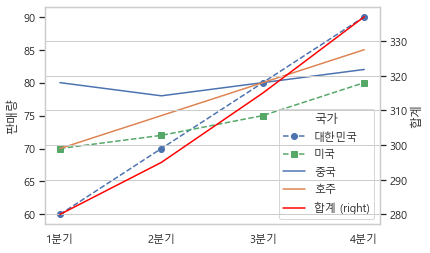

In [18]:
# 2중축 차트 - 합계를 두 번째 y축으로 지정함
# 기본축 차트 - x축 생략, y축은 [대한민국, 미국, 중국, 호주]를 사용함
# 보조축 차트 - y축 : 합계, ax를 기본축으로 지정, color: red, secondary_y=True
ax1 = dfT.plot.line(y=['대한민국', '미국', '중국', '호주'], style={'대한민국':'bo--', '미국':'gs--'})
ax2 = dfT.plot.line(y='합계', ax=ax1, color='red', secondary_y=True)

# ax.set_ylabel(레이블)을 사용해 y축 레이블을 설정
ax1.set_ylabel('판매량')
ax2.set_ylabel('합계')

plt.show()

## Bar Plot

In [19]:
df

,국가,1분기,2분기,3분기,4분기
3,대한민국,60,70,80,90
4,미국,70,72,75,80
5,중국,80,78,80,82
6,호주,70,75,80,85


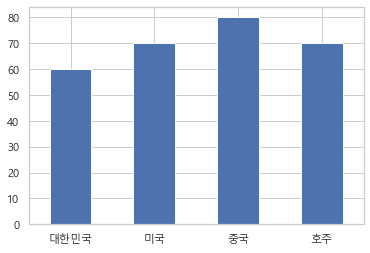

In [20]:
# bar 그래프 = x축 국가, y축 1분기
# rot=0, xlabel='', legend=False 를 사용하여 label 표시 변경, 불필요한 내용 제거
df.plot.bar(x='국가', y='1분기', rot=0, xlabel='', legend=False)
plt.show()

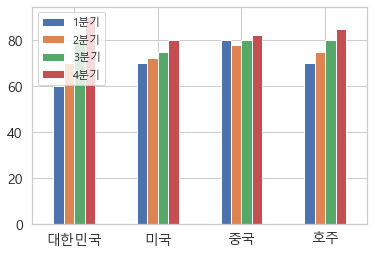

In [21]:
# bar 그래프 = 국가별 1~4분기 매출
# xlabel, rot, fontsize 사용하기
df.plot.bar(x='국가', y=['1분기','2분기','3분기','4분기'], rot=0, xlabel='', fontsize=14)
plt.show()

In [22]:
dfT.index.name = '분기'
dfT

국가,대한민국,미국,중국,호주,합계
분기,,,,,
1분기,60,70,80,70,280
2분기,70,72,78,75,295
3분기,80,75,80,80,315
4분기,90,80,82,85,337


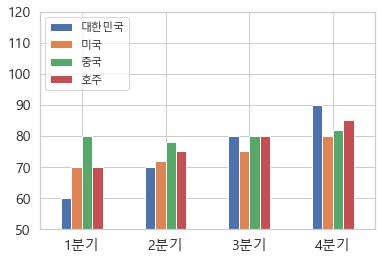

In [23]:
# bar 그래프 = 분기별 국가들의 매출
# x축: 분기, y축 : [대한민국, 미국, 중국, 호주]
# ylim 사용하여 범례 및 데이터 표시 ylim=(50,100)
dfT.plot.bar(y=['대한민국', '미국', '중국', '호주'], rot=0, xlabel='', ylim=(50, 120), fontsize=14)
plt.legend(loc='upper left')
plt.show()

## Stacked Bar Plot

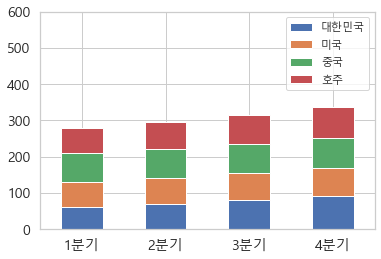

In [24]:
# Stacked Bar 그래프 - 분기별 국가들의 매출
# stacked=True 의 사용으로 쌓은 형태로 표시
dfT.plot.bar(y=['대한민국', '미국', '중국', '호주'], rot=0, xlabel='', ylim=(0, 600), fontsize=14, stacked=True)
plt.legend(loc='best')
plt.show()

## Pie Plot

- 범례 위치 : https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart

In [25]:
dfT

국가,대한민국,미국,중국,호주,합계
분기,,,,,
1분기,60,70,80,70,280
2분기,70,72,78,75,295
3분기,80,75,80,80,315
4분기,90,80,82,85,337


In [26]:
s = dfT['대한민국']
s

분기
1분기    60
2분기    70
3분기    80
4분기    90
Name: 대한민국, dtype: int64

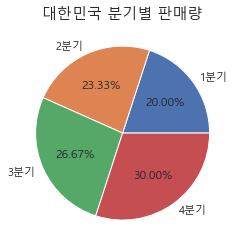

In [36]:
# [13] Pie 그래프 - Series 사용 
# autopct 사용, ylabel 제거
s.plot.pie(autopct='%.2f%%', ylabel='')
plt.title('대한민국 분기별 판매량', fontsize=15)
plt.show()

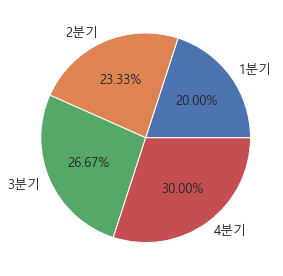

In [43]:
# [14] Pie 그래프 - DataFrame 사용 
dfT.plot.pie(y='대한민국', fontsize=13, autopct='%.2f%%', ylabel='', legend=False)
plt.tight_layout()
plt.show()

## 히스토그램(Histogram)

In [44]:
# 데이터 준비하기
import seaborn as sns
iris = sns.load_dataset("iris")  # 붓꽂 데이터
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


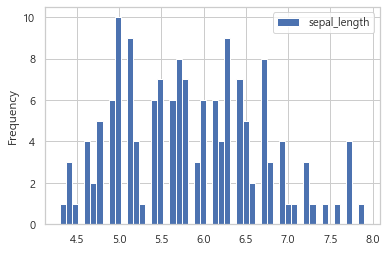

In [50]:
# [15] 특정 컬럼에 대해 히스토그램 그리기
# y축 : sepal_length, bins : 50 (bin : x축 구간)
iris.plot.hist(y='sepal_length', bins=50)
plt.show()

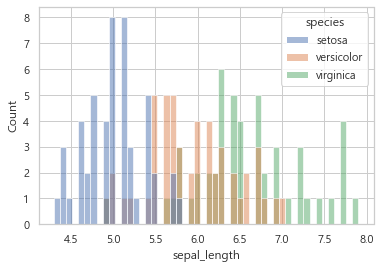

In [58]:
# [16] seaborn으로 특정 컬럼에 대해 범주별 히스토그램 그리기
# data : iris, x축 : 'sepal_length', hue : 'species', bins : 50, alpha:0.5 (0 ~ 1(진함))
sns.histplot(data=iris, x='sepal_length', hue='species', bins=50, alpha=0.5)
plt.show()

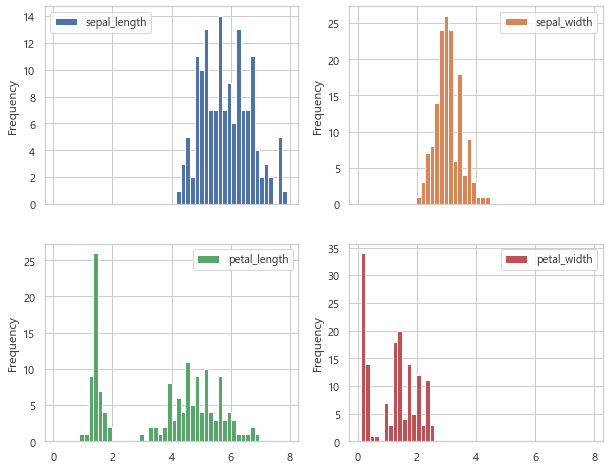

In [63]:
# [17] 컬럼별 히스토그램 그리기
# bins : 50, layout : (2,2), subplots=True, figsize=(8, 4)
iris.plot.hist(bins=50, layout=(2,2), subplots=True, figsize=(10,8))
plt.show()

## Boxplot

In [67]:
# 붓꽂 데이터 불러오기
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


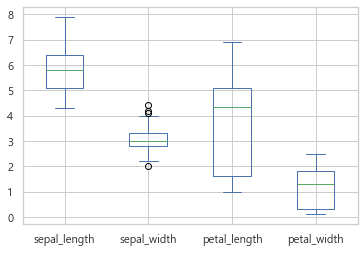

In [72]:
# [18] iris 데이터에 대한 Box plot 그리기
iris.plot.box()
plt.grid(True)
plt.show()

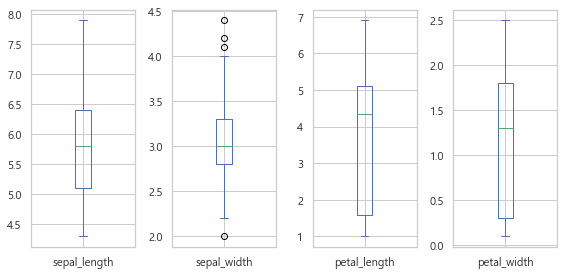

In [74]:
# [19] iris 데이터에 대한 Box plot 그리기
# subplots로 열 별 출력, figsize=(8, 4) 사용
iris.plot.box(subplots=True, figsize=(8,4))
plt.tight_layout()
plt.show()